In [ ]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from  tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.layers import Attention
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
from random import randint, uniform
from keras.utils import to_categorical

In [ ]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((196, 196))
image_size = 0
directory_root = '/content/drive/MyDrive/PLANT_DISEASES_DATASET/RESIZE'
width=196
height=196
depth=3

In [ ]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")

        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:

            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
            print(f"[INFO] Processing {plant_disease_folder} {len(plant_disease_image_list)}")

            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True or image_directory.endswith(".JPEG") == True:
                    image = cv2.imread(image_directory)
                    if image is not None :
                        image = cv2.resize(image, (196, 196)).flatten()
                        image_list.append(image)
                        label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing APPLE_HEALTHY 1500
[INFO] Processing APPLE_RUST 1500
[INFO] Processing APPLE_SCAB 1500
[INFO] Processing CASHEW_ANTHRACNOSE 1500
[INFO] Processing CASHEW_HEALTHY 1500
[INFO] Processing CASHEW_RED_RUST 1500
[INFO] Processing CASSAVA_BROWN_SPOT 1500
[INFO] Processing CASSAVA_HEALTHY 1500
[INFO] Processing CASSAVA_MOSAIC_VIRUS 1500
[INFO] Processing COCOA_ANTHRACNOSE 1500
[INFO] Processing COCOA_CSSVD 1500
[INFO] Processing COCOA_HEALTHY 1500
[INFO] Processing GRAPE_BLACK_MEASLES 1500
[INFO] Processing GRAPE_BLACK_ROT 1500
[INFO] Processing GRAPE_HEALTHY 1500
[INFO] Processing GROUNDNUT_HEALTHY 1500
[INFO] Processing GROUNDNUT_LEAF_SPOT 1500
[INFO] Processing GROUNDNUT_RUST 1500
[INFO] Processing MAIZE_HEALTHY 1500
[INFO] Processing MAIZE_MOSAIC_VIRUS 1500
[INFO] Processing MAIZE_STREAK_VIRUS 1500
[INFO] Processing POTATO_EARLY_BLIGHT 1500
[INFO] Processing POTATO_HEALTHY 1500
[INFO] Processing POTATO_LATE_BLIGHT 1500
[INFO] Processing TOMATO_EA

In [ ]:
image_size = len(image_list)

In [ ]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [ ]:
print(label_binarizer.classes_)

['APPLE_HEALTHY' 'APPLE_RUST' 'APPLE_SCAB' 'BEANS_ANGULAR_LEAF_SPOT'
 'BEANS_HEALTHY' 'BEANS_RUST' 'CASHEW_ANTHRACNOSE' 'CASHEW_HEALTHY'
 'CASHEW_RED_RUST' 'CASSAVA_BROWN_SPOT' 'CASSAVA_HEALTHY'
 'CASSAVA_MOSAIC_VIRUS' 'COCOA_ANTHRACNOSE' 'COCOA_CSSVD' 'COCOA_HEALTHY'
 'GRAPE_BLACK_MEASLES' 'GRAPE_BLACK_ROT' 'GRAPE_HEALTHY'
 'GROUNDNUT_HEALTHY' 'GROUNDNUT_LEAF_SPOT' 'GROUNDNUT_RUST'
 'MAIZE_HEALTHY' 'MAIZE_MOSAIC_VIRUS' 'MAIZE_STREAK_VIRUS'
 'POTATO_EARLY_BLIGHT' 'POTATO_HEALTHY' 'POTATO_LATE_BLIGHT'
 'TOMATO_EARLY_BLIGHT' 'TOMATO_HEALTHY' 'TOMATO_SEPTORIA_LEAF_SPOT']


In [ ]:
#np_image_list = np.array(image_list, dtype=np.float16) / 225.0
np_image_list = np.array(image_list, dtype="float") / 255.0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42)

In [ ]:
x_train_reshaped = x_train.reshape((-1,196, 196, 3))
x_test_reshaped = x_test.reshape((-1,196, 196, 3))

In [ ]:
x_train_flatten=x_train.flatten()

In [ ]:
print(x_train_flatten.shape)

(553190400,)


In [ ]:
!pip install autokeras

import autokeras as ak


# Assuming X_train and y_train are your training data
# and labels respectively

# Initialize ImageClassifier with NAS

clf = ak.ImageClassifier(max_trials=5, overwrite=True)

# Search for the best model architecture
clf.fit(x_train_reshaped, y_train, epochs=10)

# Evaluate the model
accuracy = clf.evaluate(x_test_reshaped, y_test)[1]
print("Test accuracy: {:.2f}%".format(accuracy * 100))


Trial 5 Complete [00h 19m 45s]
val_loss: 0.08694283664226532

Best val_loss So Far: 0.08335854113101959
Total elapsed time: 01h 03m 18s
Epoch 1/10
Not enough memory, reduce batch size to 16.
Epoch 1/10
Not enough memory, reduce batch size to 8.
Epoch 1/10
600/600 [==============================] - 158s 191ms/step - loss: 2.0955 - accuracy: 0.5596
Epoch 2/10
600/600 [==============================] - 115s 191ms/step - loss: 0.5716 - accuracy: 0.8838
Epoch 3/10
600/600 [==============================] - 114s 191ms/step - loss: 0.2407 - accuracy: 0.9521
Epoch 4/10
600/600 [==============================] - 115s 191ms/step - loss: 0.1193 - accuracy: 0.9825
Epoch 5/10
600/600 [==============================] - 114s 191ms/step - loss: 0.0601 - accuracy: 0.9942
Epoch 6/10
600/600 [==============================] - 115s 191ms/step - loss: 0.0381 - accuracy: 0.9962
Epoch 7/10
600/600 [==============================] - 114s 190ms/step - loss: 0.0233 - accuracy: 0.9983
Epoch 8/10
600/600 [=======

In [ ]:
import numpy as np

# Predictions
y_pred = np.argmax(clf.predict(x_test_reshaped), axis=1)
y_test = y_test=np.argmax(y_test, axis=1)


38/38 [==============================] - 5s 121ms/step


Accuracy   : 0.985
Precision : 0.985
Recall    : 0.985
F1-score  : 0.9849898376230677


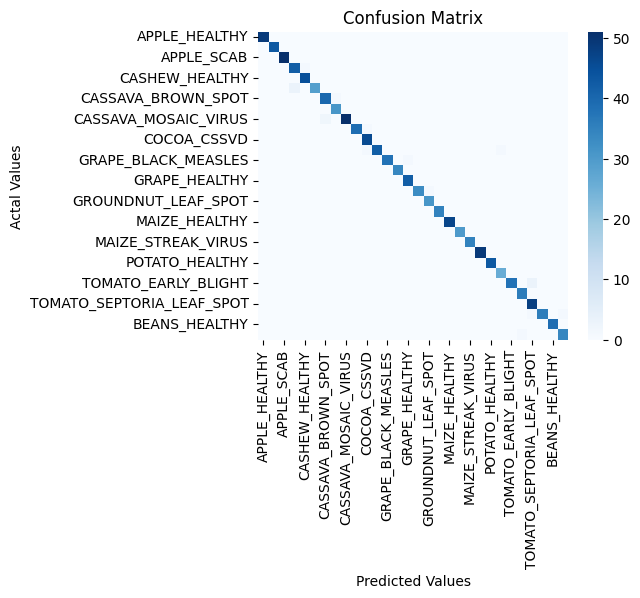

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        51
           3       0.93      0.98      0.95        43
           4       0.98      1.00      0.99        45
           5       1.00      0.91      0.95        32
           6       0.95      0.98      0.96        41
           7       0.97      1.00      0.98        31
           8       1.00      0.96      0.98        53
           9       1.00      0.97      0.99        40
          10       0.96      1.00      0.98        46
          11       1.00      0.95      0.98        44
          12       1.00      0.97      0.99        39
          13       1.00      1.00      1.00        34
          14       0.98      1.00      0.99        42
          15       1.00      0.97      0.99        34
          16       0.97      1.00      0.98        31
   

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred, average='micro')
print("Precision :", precision)
recall = recall_score(y_test, y_pred, average='micro')
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred, average='weighted')
print("F1-score  :", F1_score)
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['APPLE_HEALTHY','APPLE_RUST','APPLE_SCAB','CASHEW_ANTHRACNOSE','CASHEW_HEALTHY','CASHEW_RED_RUST','CASSAVA_BROWN_SPOT','CASSAVA_HEALTHY','CASSAVA_MOSAIC_VIRUS','COCOA_ANTHRACNOSE','COCOA_CSSVD','COCOA_HEALTHY','GRAPE_BLACK_MEASLES','GRAPE_BLACK_ROT','GRAPE_HEALTHY','GROUNDNUT_HEALTHY','GROUNDNUT_LEAF_SPOT','GROUNDNUT_RUST','MAIZE_HEALTHY','MAIZE_MOSAIC_VIRUS','MAIZE_STREAK_VIRUS','POTATO_EARLY_BLIGHT','POTATO_HEALTHY','POTATO_LATE_BLIGHT','TOMATO_EARLY_BLIGHT','TOMATO_HEALTHY','TOMATO_SEPTORIA_LEAF_SPOT','BEANS_ANGULAR_LEAF_SPOT','BEANS_HEALTHY','BEANS_RUST'],
                     columns = ['APPLE_HEALTHY','APPLE_RUST','APPLE_SCAB','CASHEW_ANTHRACNOSE','CASHEW_HEALTHY','CASHEW_RED_RUST','CASSAVA_BROWN_SPOT','CASSAVA_HEALTHY','CASSAVA_MOSAIC_VIRUS','COCOA_ANTHRACNOSE','COCOA_CSSVD','COCOA_HEALTHY','GRAPE_BLACK_MEASLES','GRAPE_BLACK_ROT','GRAPE_HEALTHY','GROUNDNUT_HEALTHY','GROUNDNUT_LEAF_SPOT','GROUNDNUT_RUST','MAIZE_HEALTHY','MAIZE_MOSAIC_VIRUS','MAIZE_STREAK_VIRUS','POTATO_EARLY_BLIGHT','POTATO_HEALTHY','POTATO_LATE_BLIGHT','TOMATO_EARLY_BLIGHT','TOMATO_HEALTHY','TOMATO_SEPTORIA_LEAF_SPOT','BEANS_ANGULAR_LEAF_SPOT','BEANS_HEALTHY','BEANS_RUST'])


plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

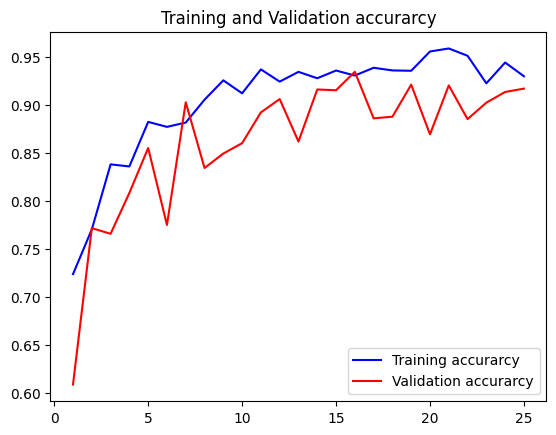

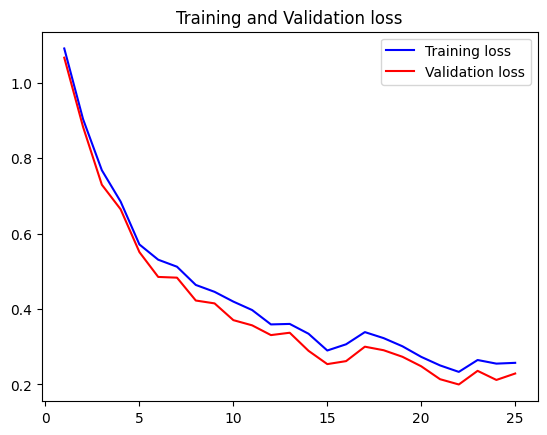

In [ ]:
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()